In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

### 1. Load the dataset into python environment

In [2]:
data=pd.read_csv('titanic_dataset .csv')

In [3]:
data.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


## 2. Pre-Processing

In [4]:
data.set_index('PassengerId', inplace=True)

In [5]:
data.shape

(891, 11)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [7]:
data.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [8]:
data.describe(include=['object'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,B96 B98,S
freq,1,577,7,4,644


In [9]:
data.isna().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [10]:
data['Age'].fillna(data['Age'].median(), inplace=True)
# Age column is filled using median

In [11]:
data['Age'].isna().sum()

0

<Axes: xlabel='Pclass', ylabel='count'>

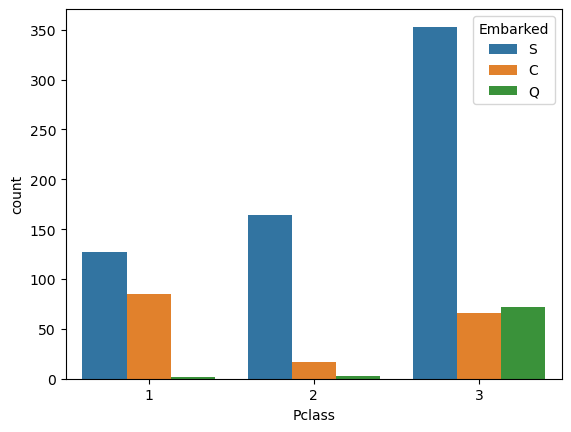

In [12]:
# Fill missing embarked values based on mode
sns.countplot(data=data, x='Pclass', hue='Embarked')

In [13]:
data['Embarked']=data['Embarked'].fillna(data['Embarked'].mode()[0])
#filled using mode

In [14]:
data['Embarked'].isna().sum()

0

In [15]:
data.columns

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [16]:
# Drop columns that don't contain significative information
data = data.drop(['Cabin','Name', 'Ticket'], axis=1)

In [17]:
#  join the amount of siblings, spouses, parents and children on board as an unique variable
data['relatives'] = data['SibSp'] + data['Parch']
data.drop(['SibSp', 'Parch'], axis=1, inplace=True)

In [18]:
# Instead of counting how many relatives were on board, categorize the variable based on if it had siblings (1) or not (0) on board
data['relatives'] = data['relatives'].apply(lambda x: 'yes' if x>0 else 'no')

<Axes: xlabel='relatives', ylabel='count'>

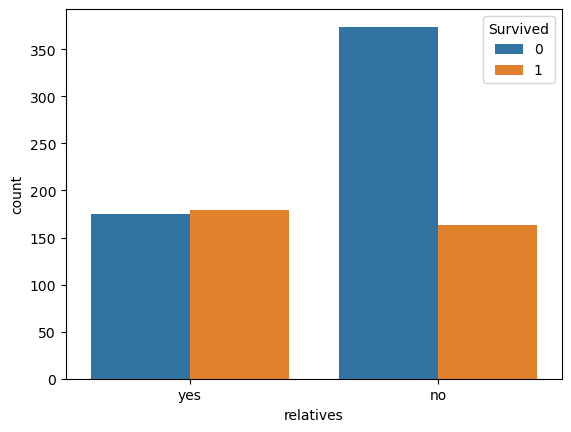

In [19]:
sns.countplot(data=data, x='relatives', hue='Survived')

In [20]:
def drop_outliers(data, x):
    Q1 = data[x].quantile(0.25)
    Q3 = data[x].quantile(0.75)
    IQR= Q3-Q1
    
    lower_bound = Q1-IQR*1.5
    upper_bound = Q3 +IQR*1.5
    
    return data[(data[x] >= lower_bound) & (data[x] <= upper_bound)]

In [21]:
names = ['Age', 'Fare']

for name in names:
   data = drop_outliers(data, name)


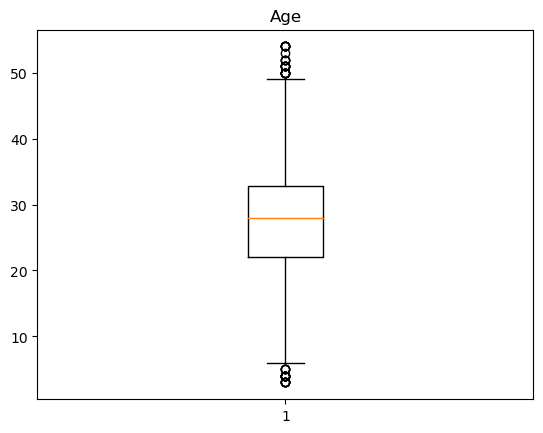

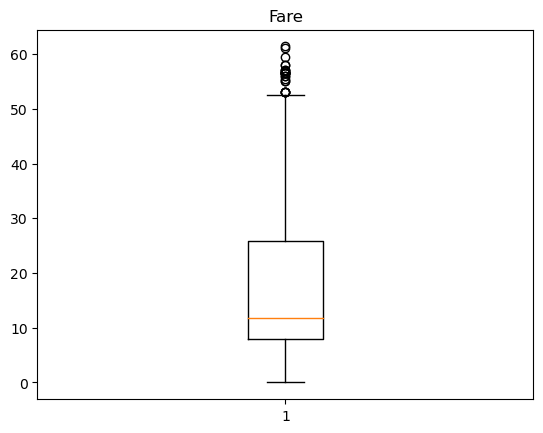

In [22]:
columns=['Age','Fare']
for i in columns:
    plt.figure()
    plt.boxplot(data[i])
    plt.title(i)

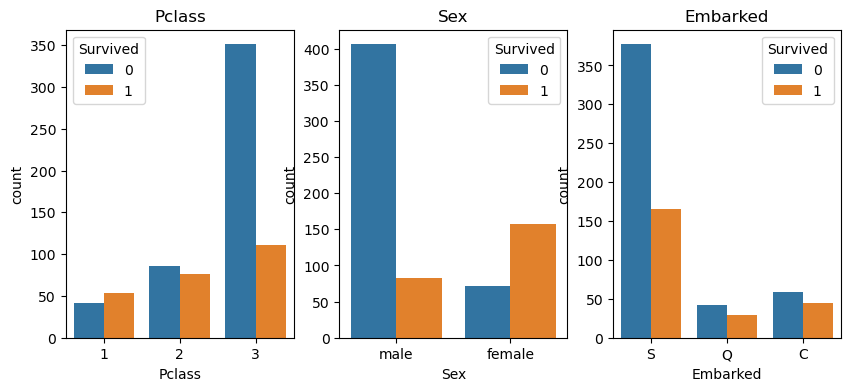

<Figure size 640x480 with 0 Axes>

In [23]:
names = ['Pclass', 'Sex', 'Embarked']
fig, axes = plt.subplots(1,3, figsize=(10,4)) 

for i in range(3):
    sns.countplot(x=data[names[i]], hue=data['Survived'],ax=axes[i]).set_title(names[i])
    

plt.show()
plt.tight_layout()

In [24]:
data.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'Fare', 'Embarked', 'relatives'], dtype='object')

In [25]:
# To analyze correlation between categorical variables, we'll hot-encode them
data = pd.get_dummies(data, drop_first=True)

In [26]:
data.head(10)

,Survived,Pclass,Age,Fare,Sex_male,Embarked_Q,Embarked_S,relatives_yes
PassengerId,,,,,,,,
1,0,3,22.0,7.2500,True,False,True,True
3,1,3,26.0,7.9250,False,False,True,False
4,1,1,35.0,53.1000,False,False,True,True
5,0,3,35.0,8.0500,True,False,True,False
6,0,3,28.0,8.4583,True,True,False,False
7,0,1,54.0,51.8625,True,False,True,False
9,1,3,27.0,11.1333,False,False,True,True
10,1,2,14.0,30.0708,False,False,False,True
11,1,3,4.0,16.7000,False,False,True,True


<Axes: >

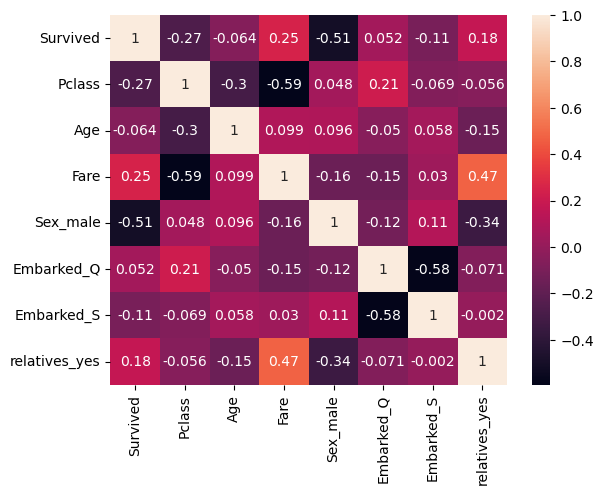

In [27]:
sns.heatmap(data.corr(), annot=True,)

### 3.Create kNN and SVM models and 4.Do k-fold and stratified stratified k-fold cross validation techniques and find the average accuracy score of the models

### KNN

In [28]:
from sklearn.model_selection import train_test_split

In [29]:
y = data['Survived']
X = data.drop('Survived', axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=17)

In [30]:

from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,f1_score

In [31]:
from sklearn.neighbors import KNeighborsClassifier
metric=[]
neighbours=np.arange(3,14)  

for k in neighbours:
    classifier=KNeighborsClassifier(n_neighbors=k,metric='euclidean',p=2)
    classifier.fit(X_train,y_train)
    y_pred_knn=classifier.predict(X_test)
    acc=accuracy_score(y_test,y_pred_knn)
    metric.append(acc)

In [32]:
metric

[0.7361111111111112,
 0.7430555555555556,
 0.7222222222222222,
 0.75,
 0.7291666666666666,
 0.75,
 0.7569444444444444,
 0.75,
 0.75,
 0.75,
 0.7222222222222222]

Text(0, 0.5, 'Accuracy')

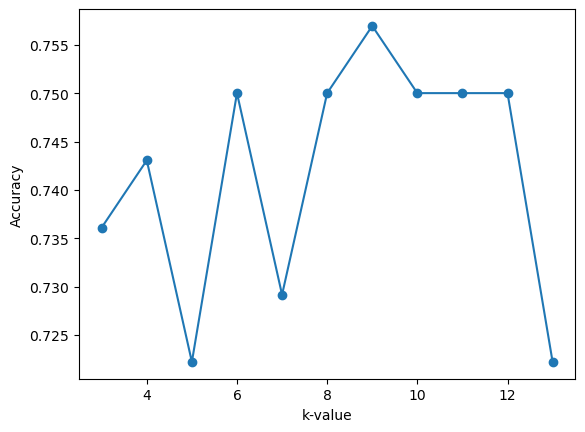

In [33]:
plt.plot(neighbours,metric,'o-')
plt.xlabel('k-value')
plt.ylabel('Accuracy')

In [34]:
classifier=KNeighborsClassifier(n_neighbors=9,metric='euclidean',p=2)
classifier.fit(X_train,y_train)
y_pred_knn=classifier.predict(X_test)

#### K Fold

In [35]:
from sklearn.model_selection import KFold

In [36]:
kfold_val=KFold(20)

In [37]:
for train_index,test_index in kfold_val.split(X,y):
    print('Training Index:',train_index)
    print('Testing Index:',test_index)

Training Index: [ 36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233
 234 235 236 237 238 239 240 241 242 243 244 245 246 247 248 249 250 251
 252 253 254 255 256 257 258 259 260 261 262 263 264 265 266 267 268 269
 270 271 272 273 274 275 276 277 27

In [38]:
from sklearn.model_selection import cross_val_score

In [39]:
cv_score=cross_val_score(classifier,X,y,cv=kfold_val)

In [40]:
cv_score

array([0.55555556, 0.72222222, 0.69444444, 0.72222222, 0.63888889,
       0.63888889, 0.72222222, 0.66666667, 0.69444444, 0.61111111,
       0.80555556, 0.72222222, 0.66666667, 0.86111111, 0.77777778,
       0.80555556, 0.80555556, 0.77777778, 0.77142857, 0.74285714])

In [41]:
np.mean(cv_score)

0.7201587301587302

#### Stratified  K Fold

In [42]:
from sklearn.model_selection import StratifiedKFold
skfold_val=StratifiedKFold(n_splits=20)

In [43]:
for train_index,test_index in skfold_val.split(X,y):
    print('Training Index:',train_index)
    print('Testing Index:',test_index)

Training Index: [ 25  27  30  34  35  38  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233
 234 235 236 237 238 239 240 241 242 243 244 245 246 247 248 249 250 251
 252 253 254 255 256 257 258 259 260 261 262 263 264 265 266 267 268 269
 270 271 272 273 274 275 276 277 27

In [44]:
skcv_score=cross_val_score(classifier,X,y,cv=skfold_val)

In [45]:
skcv_score

array([0.61111111, 0.75      , 0.63888889, 0.66666667, 0.66666667,
       0.66666667, 0.69444444, 0.66666667, 0.80555556, 0.63888889,
       0.63888889, 0.86111111, 0.72222222, 0.80555556, 0.80555556,
       0.80555556, 0.77777778, 0.75      , 0.71428571, 0.77142857])

In [46]:
np.mean(skcv_score)

0.7228968253968254

### SVM

In [47]:
from sklearn.svm import SVC
svmclf=SVC(kernel='linear')
svmclf.fit(X_train,y_train)

SVC(kernel='linear')

In [48]:
y_pred_svm=svmclf.predict(X_test)

In [49]:
cv_score=cross_val_score(svmclf,X,y,cv=kfold_val)

In [50]:
np.mean(cv_score)     #KFold

0.7841666666666668

In [51]:
skcv_score=cross_val_score(svmclf,X,y,cv=skfold_val)

In [52]:
np.mean(skcv_score) #Stratified K Fold

0.7841269841269842

SVM Model is better than KNN